In [ ]:
# Listing all the input files.
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/lish-moa/sample_submission.csv
/kaggle/input/lish-moa/train_drug.csv
/kaggle/input/lish-moa/train_targets_scored.csv
/kaggle/input/lish-moa/train_targets_nonscored.csv
/kaggle/input/lish-moa/train_features.csv
/kaggle/input/lish-moa/test_features.csv


In [1]:
# Importing all the necessary libraries.
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from keras import layers
from tensorflow.keras.layers import Activation,Dense,Dropout,BatchNormalization,Input
from keras.models import Sequential
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import tensorflow_addons as tfa
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
# Reading the input files as dataframes.
X_train = pd.read_csv('../input/lish-moa/train_features.csv')
Y_train_processed = pd.read_csv('../input/lish-moa/train_targets_scored.csv', index_col=0)
X_test = pd.read_csv('../input/lish-moa/test_features.csv')
sample_submission = pd.read_csv('../input/lish-moa/sample_submission.csv')

In [ ]:
# Feature engineering: Selected the subset of features based on correlation. Tried PCA, the results were not that good.

top_features = [  1,   2,   3,   4,   5,   6,   7,   9,  11,  14,  15,  16,  17,
        18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  29,  30,  31,
        32,  33,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  46,
        47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  58,  59,  60,
        61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,
        74,  75,  76,  78,  79,  80,  81,  82,  83,  84,  86,  87,  88,
        89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101,
       102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
       115, 116, 117, 118, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 149, 150, 151, 152, 153, 154, 155, 156, 157,
       158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170,
       171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183,
       184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 197,
       198, 199, 200, 202, 203, 204, 205, 206, 208, 209, 210, 211, 212,
       213, 214, 215, 216, 217, 218, 219, 220, 221, 223, 224, 225, 226,
       227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239,
       240, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253,
       254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266,
       267, 268, 269, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280,
       281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 294,
       295, 296, 298, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309,
       310, 311, 312, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323,
       324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336,
       337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349,
       350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362,
       363, 364, 365, 366, 367, 368, 369, 370, 371, 374, 375, 376, 377,
       378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 390, 391,
       392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404,
       405, 406, 407, 408, 409, 411, 412, 413, 414, 415, 416, 417, 418,
       419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431,
       432, 434, 435, 436, 437, 438, 439, 440, 442, 443, 444, 445, 446,
       447, 448, 449, 450, 453, 454, 456, 457, 458, 459, 460, 461, 462,
       463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475,
       476, 477, 478, 479, 481, 482, 483, 484, 485, 486, 487, 488, 489,
       490, 491, 492, 493, 494, 495, 496, 498, 500, 501, 502, 503, 505,
       506, 507, 509, 510, 511, 512, 513, 514, 515, 518, 519, 520, 521,
       522, 523, 524, 525, 526, 527, 528, 530, 531, 532, 534, 535, 536,
       538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 549, 550, 551,
       552, 554, 557, 559, 560, 561, 562, 565, 566, 567, 568, 569, 570,
       571, 572, 573, 574, 575, 577, 578, 580, 581, 582, 583, 584, 585,
       586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 599,
       600, 601, 602, 606, 607, 608, 609, 611, 612, 613, 615, 616, 617,
       618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630,
       631, 632, 633, 634, 635, 636, 637, 638, 639, 641, 642, 643, 644,
       645, 646, 647, 648, 649, 650, 651, 652, 654, 655, 656, 658, 659,
       660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672,
       673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685,
       686, 687, 688, 689, 691, 692, 693, 694, 695, 696, 697, 699, 700,
       701, 702, 704, 705, 707, 708, 709, 710, 711, 713, 714, 716, 717,
       718, 720, 721, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732,
       733, 734, 735, 737, 738, 739, 740, 742, 743, 744, 745, 746, 747,
       748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 759, 760, 761,
       762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774,
       775, 776, 777, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788,
       789, 790, 792, 793, 794, 795, 796, 797, 798, 800, 801, 802, 803,
       804, 805, 806, 808, 809, 811, 813, 814, 815, 816, 817, 818, 819,
       821, 822, 823, 825, 826, 827, 828, 829, 830, 831, 832, 834, 835,
       837, 838, 839, 840, 841, 842, 845, 846, 847, 848, 850, 851, 852,
       854, 855, 856, 858, 859, 860, 861, 862, 864, 866, 867, 868, 869,
       870, 871, 872, 873, 874]

In [ ]:
# Preprocessing the data by mapping non-numeric features to numeric values and removing the id column.

def preprocess(df):
    df.loc[:, 'cp_type'] = df.loc[:, 'cp_type'].map({'trt_cp': 0, 'ctl_vehicle': 1})
    df.loc[:, 'cp_dose'] = df.loc[:, 'cp_dose'].map({'D1': 0, 'D2': 1})
    del df['sig_id']
    return df

X_train_processed = preprocess(X_train)
X_test_processed = preprocess(X_test)

In [ ]:
# Defining the model with multiple hidden layers and few optimizations such as BatchNorm, WeightNorm and Dropout.

model = tf.keras.Sequential([
    tf.keras.layers.Input(len(top_features)),
    tf.keras.layers.BatchNormalization(),
    tfa.layers.WeightNormalization(tf.keras.layers.Dense(4096, activation="elu")),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tfa.layers.WeightNormalization(tf.keras.layers.Dense(4096, activation="elu")),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tfa.layers.WeightNormalization(tf.keras.layers.Dense(4096, activation="elu")),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tfa.layers.WeightNormalization(tf.keras.layers.Dense(4096, activation="elu")),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tfa.layers.WeightNormalization(tf.keras.layers.Dense(4096, activation="elu")),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tfa.layers.WeightNormalization(tf.keras.layers.Dense(4096, activation="elu")),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tfa.layers.WeightNormalization(tf.keras.layers.Dense(4096, activation="elu")),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tfa.layers.WeightNormalization(tf.keras.layers.Dense(4096, activation="elu")),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tfa.layers.WeightNormalization(tf.keras.layers.Dense(4096, activation="elu")),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tfa.layers.WeightNormalization(tf.keras.layers.Dense(4096, activation="elu")),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tfa.layers.WeightNormalization(tf.keras.layers.Dense(4096, activation="elu")),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tfa.layers.WeightNormalization(tf.keras.layers.Dense(4096, activation="elu")),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tfa.layers.WeightNormalization(tf.keras.layers.Dense(4096, activation="elu")),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tfa.layers.WeightNormalization(tf.keras.layers.Dense(4096, activation="elu")),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tfa.layers.WeightNormalization(tf.keras.layers.Dense(4096, activation="elu")),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tfa.layers.WeightNormalization(tf.keras.layers.Dense(4096, activation="elu")),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tfa.layers.WeightNormalization(tf.keras.layers.Dense(4096, activation="elu")),
    tf.keras.layers.Dropout(0.2),    
    tf.keras.layers.BatchNormalization(),
    tfa.layers.WeightNormalization(tf.keras.layers.Dense(4096, activation="elu")),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tfa.layers.WeightNormalization(tf.keras.layers.Dense(4096, activation="elu")),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tfa.layers.WeightNormalization(tf.keras.layers.Dense(4096, activation="elu")),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tfa.layers.WeightNormalization(tf.keras.layers.Dense(4096, activation="elu")),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tfa.layers.WeightNormalization(tf.keras.layers.Dense(4096, activation="elu")),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tfa.layers.WeightNormalization(tf.keras.layers.Dense(4096, activation="elu")),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tfa.layers.WeightNormalization(tf.keras.layers.Dense(4096, activation="elu")),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tfa.layers.WeightNormalization(tf.keras.layers.Dense(4096, activation="elu")),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(206, activation="sigmoid")
    ])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=2.75e-5), loss='binary_crossentropy', metrics=["accuracy", "AUC"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 785)               3140      
_________________________________________________________________
weight_normalization (Weight (None, 4096)              6443009   
_________________________________________________________________
dropout (Dropout)            (None, 4096)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 4096)              16384     
_________________________________________________________________
weight_normalization_1 (Weig (None, 4096)              33566721  
_________________________________________________________________
dropout_1 (Dropout)          (None, 4096)              0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 4096)              1

In [ ]:
# Fitting the model to the corresponding data.

history = model.fit(X_train_processed.iloc[:,top_features], Y_train_processed, batch_size = 1000, epochs = 110)

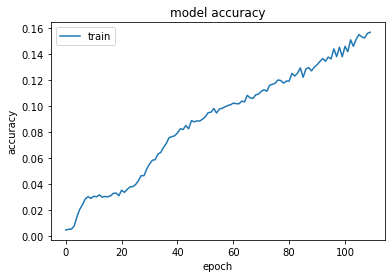

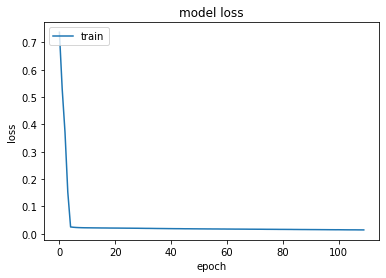

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
# function converting the arg-variable to a Keras Tensor
def my_func(arg):
  arg = tf.convert_to_tensor(arg, dtype=tf.float32)
  return arg

In [ ]:
X_final = X_test_processed.iloc[: , 1: ].values 

In [ ]:
# Processing the output and submitting.

y_pred = model.predict(my_func(X_test_processed.iloc[:,top_features]))

columns = list(sample_submission.columns)
columns.remove('sig_id')

for i in range(len(columns)):
    sample_submission[columns[i]] = y_pred[:, i]

sample_submission.to_csv('submission.csv', index=False)